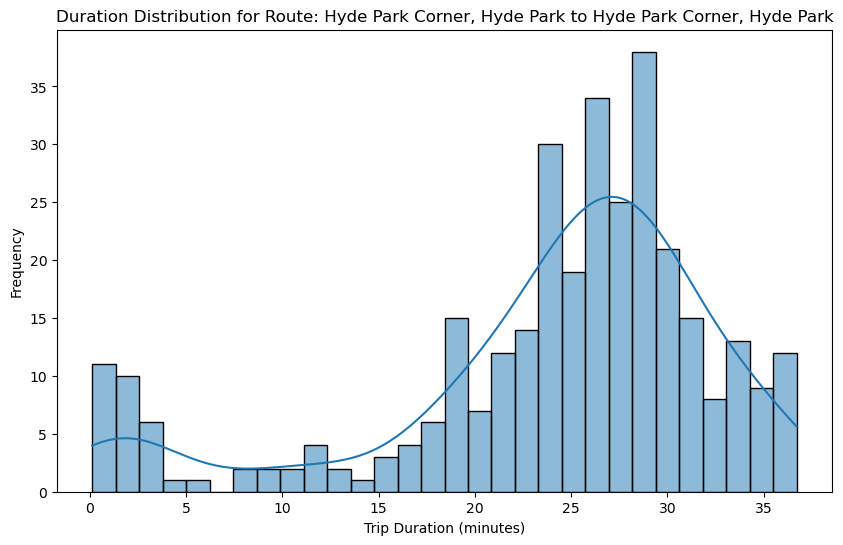

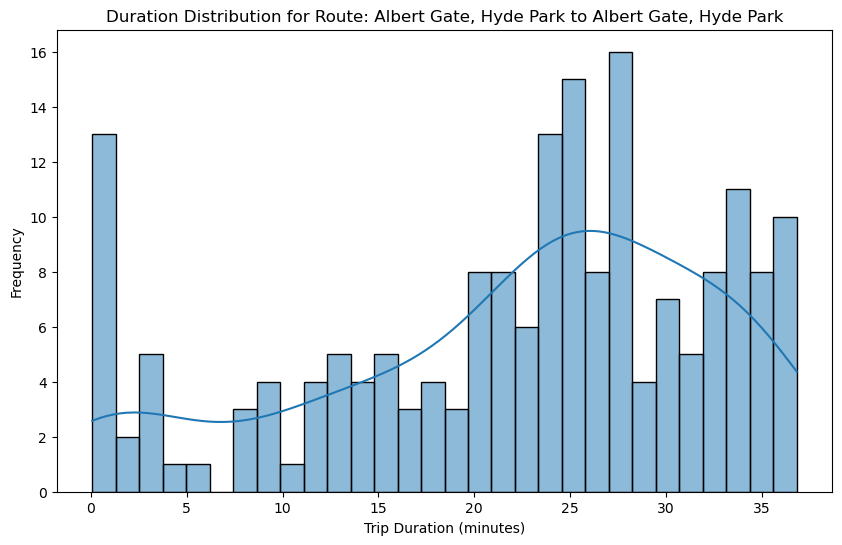

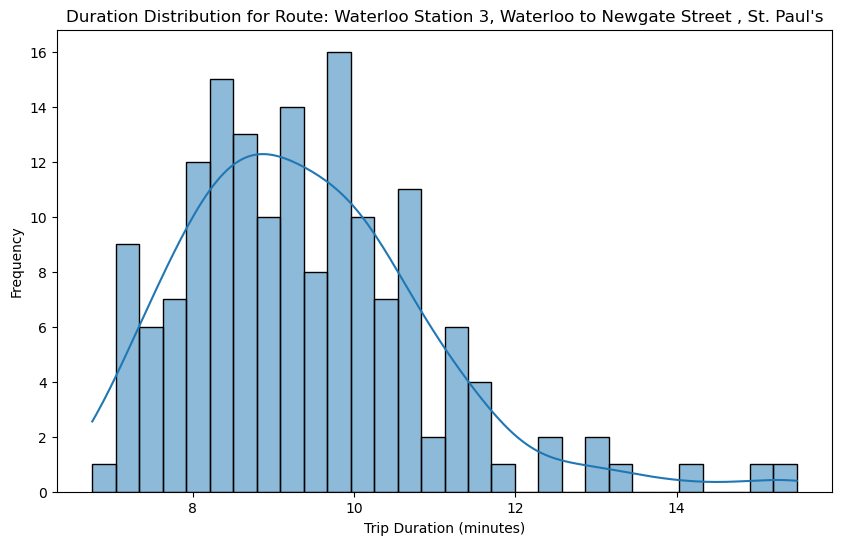

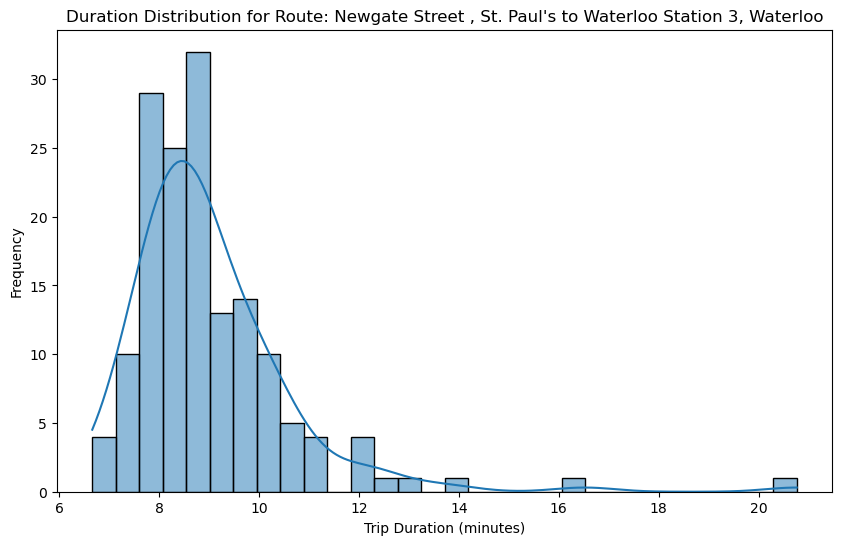

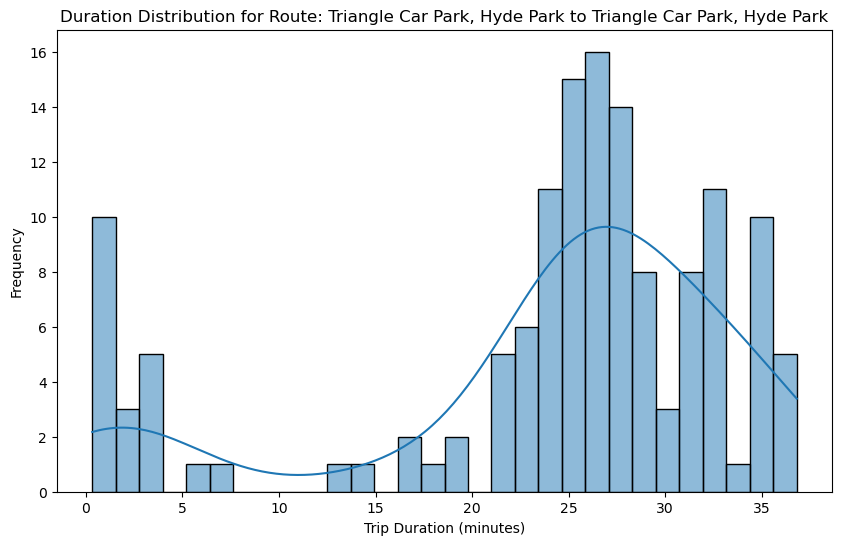

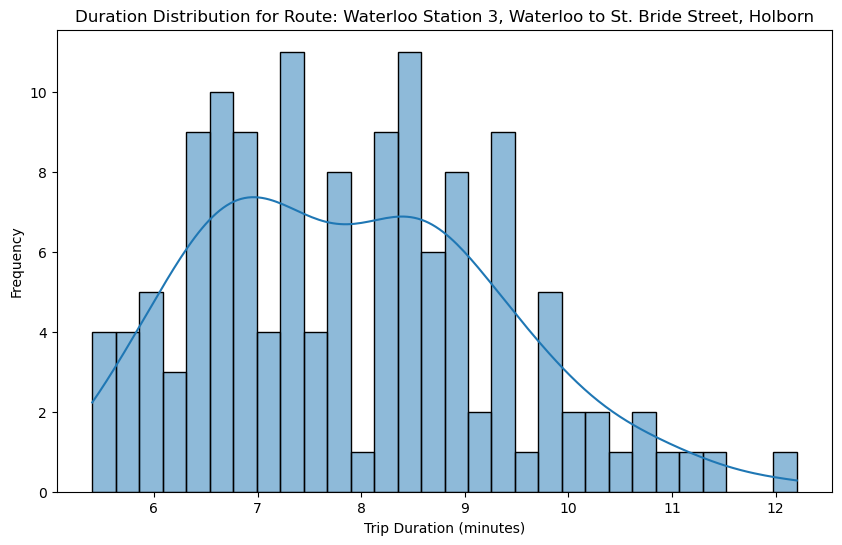

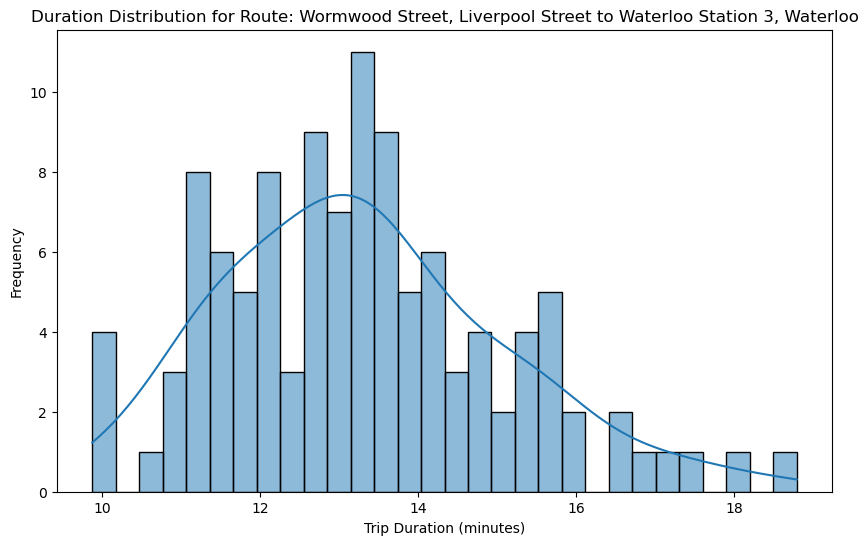

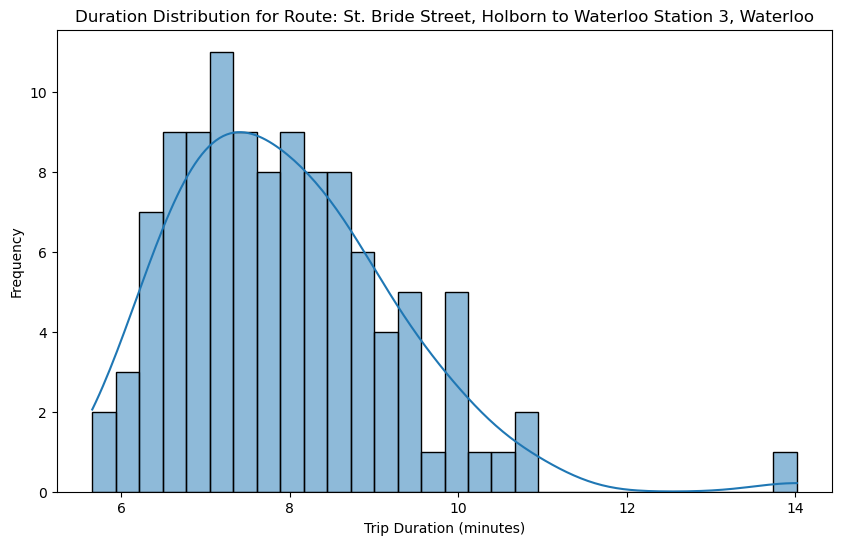

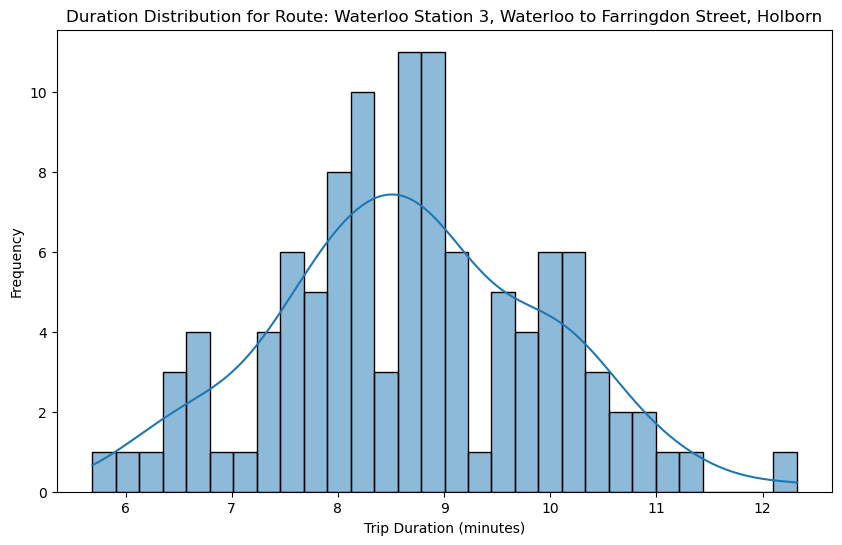

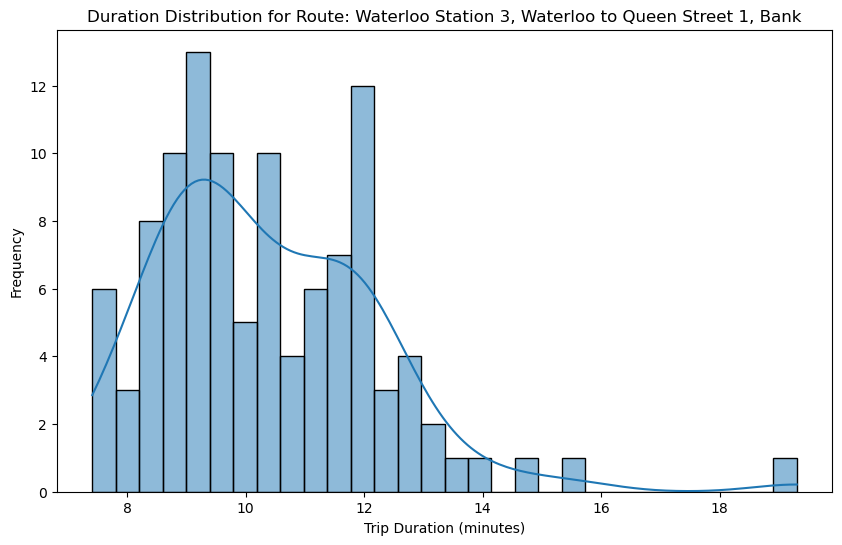

,Start station,End station,Count
26657,"Hyde Park Corner, Hyde Park","Hyde Park Corner, Hyde Park",327
543,"Albert Gate, Hyde Park","Albert Gate, Hyde Park",185
51394,"Waterloo Station 3, Waterloo","Newgate Street , St. Paul's",160
33282,"Newgate Street , St. Paul's","Waterloo Station 3, Waterloo",155
48287,"Triangle Car Park, Hyde Park","Triangle Car Park, Hyde Park",140
51448,"Waterloo Station 3, Waterloo","St. Bride Street, Holborn",134
54104,"Wormwood Street, Liverpool Street","Waterloo Station 3, Waterloo",112
43510,"St. Bride Street, Holborn","Waterloo Station 3, Waterloo",109
51306,"Waterloo Station 3, Waterloo","Farringdon Street, Holborn",108
51419,"Waterloo Station 3, Waterloo","Queen Street 1, Bank",108


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the data
file_path = 'Data/Processed data/trip_data_with_communities.csv'  # Update this path to match your local environment
df = pd.read_csv(file_path)

# Ensure the relevant columns are in the correct data type
start_station_col = 'Start station'  # Update if necessary
end_station_col = 'End station'      # Update if necessary
duration_col = 'Total duration (ms)'  # Update if necessary

df[start_station_col] = df[start_station_col].astype(str)
df[end_station_col] = df[end_station_col].astype(str)
df[duration_col] = df[duration_col].astype(float) / 60000  # Convert ms to minutes

# Group by the start and end station to count occurrences
route_counts = df.groupby([start_station_col, end_station_col]).size().reset_index(name='Count')

# Sort the routes by the number of occurrences in descending order
most_common_routes = route_counts.sort_values(by='Count', ascending=False).head(10)

# Create a directory to save the plots
output_dir = 'Data/Results/route_plots'
os.makedirs(output_dir, exist_ok=True)

# Calculate the distribution of trip durations for each of the top 10 routes and save the plots
for index, row in most_common_routes.iterrows():
    start_station = row[start_station_col]
    end_station = row[end_station_col]
    
    # Filter the original dataframe to get trips for the specific route
    route_trips = df[(df[start_station_col] == start_station) & (df[end_station_col] == end_station)]
    
    # Plot the distribution of durations for this route
    plt.figure(figsize=(10, 6))
    sns.histplot(route_trips[duration_col], bins=30, kde=True)
    plt.title(f'Duration Distribution for Route: {start_station} to {end_station}')
    plt.xlabel('Trip Duration (minutes)')
    plt.ylabel('Frequency')
    
    # Save the plot as an image file
    plot_filename = f'{start_station}_to_{end_station}.png'.replace(' ', '_')
    plt.savefig(os.path.join(output_dir, plot_filename))
    
    # Display the plot (optional)
    plt.show()

# Save the most common routes to a CSV file (optional)
most_common_routes.to_csv('Data/Results/popular_routes.csv', index=False)

most_common_routes
